In [116]:
import pandas as pd
import numpy as np
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [117]:
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_final.csv")
df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "day"], inplace = True)

In [118]:

df_cut = df
#Frankfurt
df_cut = df_cut[(df_cut["orig_lat"] > 49 ) & (df_cut["orig_lat"] < 50.3)]
df_cut = df_cut[(df_cut["orig_lng"] > 8.5 ) & (df_cut["orig_lng"] < 8.9)]
df_cut = df_cut[(df_cut["dest_lng"] < 9 ) & (df_cut["dest_lng"] > 8.45 )]

df_hour_duration = df_cut

df_start = df_cut[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]] #,"distance"

# df_td['time'] = df_hour_duration.apply(lambda row: row.hour + (row.min/(60)), axis = 1)
df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [119]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[25417.455118650425, 12242.56445110263, 9545.973167835671, 7379.644455033947, 6304.104023549689, 5445.849460546186, 4786.23526989974, 4176.4620531028095, 3778.874496555466, 3422.5445407249667]


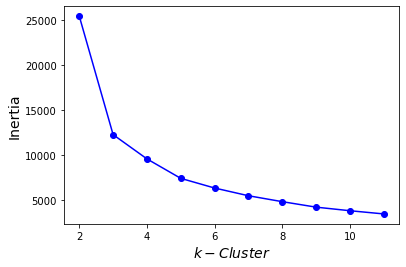

In [120]:
plt.plot(range(2, 12), inertias, "bo-")
plt.xlabel("$k-Cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


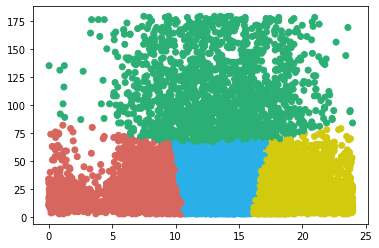

In [121]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
# array = df_td[:100].to_numpy()
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

# plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

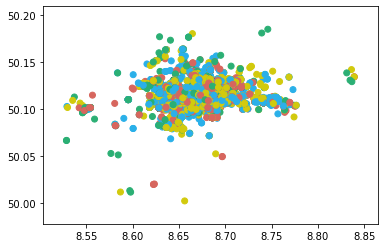

In [122]:
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)

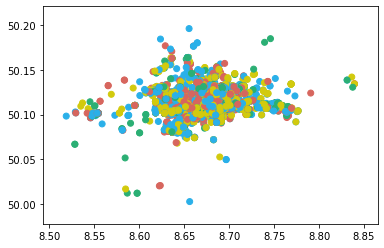

In [123]:
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)


In [124]:
df_cut["cluster"] = labels
df_cut["tripcount"] = 1
df_cut_count = len(df_cut)
df_grouped = df_cut.groupby("cluster").sum()
df_final = df_grouped[["tripcount"]]
df_final["trip_anteil"] = df_final["tripcount"]/df_cut_count
df_final["duration_anteil"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
df_final["duration_mean"] = df_grouped.trip_duration/df_grouped.tripcount
df_final["distance_anteil"] = df_grouped.distance/df_grouped.distance.sum()
df_final["distance_mean"] = df_grouped.distance/df_grouped.tripcount
df_final

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,tripcount,trip_anteil,duration_anteil,duration_mean,distance_anteil,distance_mean
cluster,,,,,,
0,6779,0.339289,0.273367,22.818115,0.341825,1.850436
1,1785,0.089339,0.349801,110.887395,0.111332,2.288860
2,5013,0.250901,0.161575,18.237981,0.241729,1.769571
3,6403,0.320470,0.215257,19.022802,0.305113,1.748695
